In [2]:
!pip install ultralytics

# LIBRERIAS

In [1]:
import os
import random
import pandas as pd
from PIL import Image
import cv2
from ultralytics import YOLO
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pathlib
import glob
from tqdm.notebook import trange, tqdm
import warnings
warnings.filterwarnings('ignore')

# INSPECCIONAR DATA

In [2]:
# Path to the images directory
image_dir = "data/train/images"

In [3]:
image_files = os.listdir(image_dir)
label_files = os.listdir('data/train/labels')
print(f"Cantidad de imagenes: {len(image_files)}")
print(f"Cantidad de labels: {len(label_files)}")

Cantidad de imagenes: 3530
Cantidad de labels: 3530


In [4]:
image_files = sorted(os.listdir(image_dir))
random_image_file = random.choice(image_files)
img_path = os.path.join(image_dir, random_image_file)
image = Image.open(img_path)

width, height = image.size
mode = image.mode

print(f"{width} x {height}")
print(f"{mode}")

416 x 416
RGB


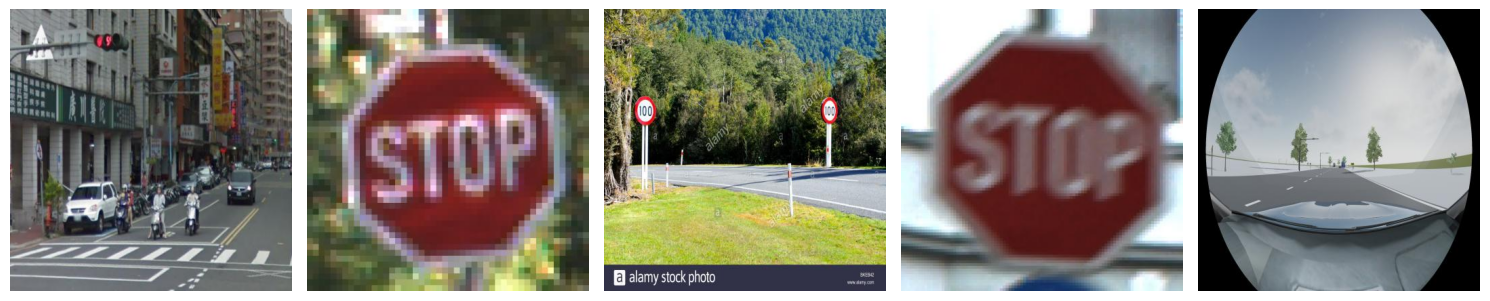

In [5]:
image_files = sorted(os.listdir(image_dir))
random.shuffle(image_files)  

image_files = image_files[:5]

plt.figure(figsize=(15, 10))
for i, img_file in enumerate(image_files):
    img_path = os.path.join(image_dir, img_file)
    
    image = Image.open(img_path)
    
    plt.subplot(1, 5, i + 1)
    plt.imshow(image)
    plt.axis('off')

plt.tight_layout()
plt.show()

In [6]:
import torch

print(f"Is CUDA available? {torch.cuda.is_available()}")
print(f"Number of GPUs: {torch.cuda.device_count()}")
if torch.cuda.is_available():
    print(f"CUDA Device Name: {torch.cuda.get_device_name(0)}")

import torch
print(torch.__version__)
print(torch.version.cuda)




Is CUDA available? False
Number of GPUs: 0
2.5.1+cpu
None


# ENTRENAR MODELO YOLOv8

In [9]:
from ultralytics import YOLO
import yaml

# Define the dataset configuration
data_config = {
    'train': 'train/images',
    'val': 'valid/images',
    'test': 'test/images',
    'nc': 15,
    'names': [
        'Green Light', 'Red Light', 'Speed Limit 10', 'Speed Limit 100', 'Speed Limit 110', 
        'Speed Limit 120', 'Speed Limit 20', 'Speed Limit 30', 'Speed Limit 40', 'Speed Limit 50', 
        'Speed Limit 60', 'Speed Limit 70', 'Speed Limit 80', 'Speed Limit 90', 'Stop'
    ]
}

# Write the configuration to a temporary YAML file
with open('data.yaml', 'w') as f:
    yaml.dump(data_config, f)

# Load the YOLO model
model = YOLO('yolov8n.pt')

from ultralytics.utils import ops


# Train the model
results = model.train(
    data='data.yaml',
    epochs=30,
    batch=16,
    imgsz=512,
    optimizer='auto',
    device='cpu',
)



Ultralytics 8.3.32  Python-3.11.9 torch-2.5.1+cu124 CPU (AMD Ryzen 9 7900X3D 12-Core Processor)
engine\trainer: task=detect, mode=train, model=yolov8n.pt, data=data.yaml, epochs=30, time=None, patience=100, batch=16, imgsz=512, save=True, save_period=-1, cache=False, device=cpu, workers=8, project=None, name=train30, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, show_boxes=T

train: Scanning C:\Users\datasets\train\labels.cache... 3530 images, 3 backgrounds, 0 corrupt: 100%|██████████| 3530/3530 [00:00<?, ?it/s]
val: Scanning C:\Users\datasets\valid\labels.cache... 801 images, 0 backgrounds, 0 corrupt: 100%|██████████| 801/801 [00:00<?, ?it/s]

Plotting labels to C:\Users\USUARIO\runs\detect\train30\labels.jpg... 


optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.000526, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
Image sizes 512 train, 512 val
Using 0 dataloader workers
Logging results to C:\Users\USUARIO\runs\detect\train30
Starting training for 30 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/30         0G      0.829      3.224      1.118         20        512: 100%|██████████| 221/221 [02:36<00:00,  1.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:14<00:00,  1.79it/s]

                   all        801        944      0.238      0.509      0.249      0.203



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/30         0G     0.7506      2.357      1.053         16        512: 100%|██████████| 221/221 [03:09<00:00,  1.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:14<00:00,  1.84it/s]

                   all        801        944      0.268      0.562      0.353       0.28



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/30         0G     0.7404       2.06      1.036         31        512: 100%|██████████| 221/221 [02:33<00:00,  1.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:13<00:00,  1.88it/s]

                   all        801        944      0.424      0.609      0.495      0.411



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/30         0G       0.72      1.778      1.023         17        512: 100%|██████████| 221/221 [02:36<00:00,  1.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:14<00:00,  1.82it/s]

                   all        801        944      0.613      0.616      0.635      0.523



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/30         0G      0.699      1.547      1.016         29        512: 100%|██████████| 221/221 [02:32<00:00,  1.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:14<00:00,  1.86it/s]

                   all        801        944      0.673      0.714      0.724       0.61



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/30         0G     0.6804      1.384      1.004         17        512: 100%|██████████| 221/221 [02:35<00:00,  1.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:14<00:00,  1.85it/s]

                   all        801        944      0.756      0.697      0.773      0.653



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/30         0G     0.6608      1.258     0.9983         22        512: 100%|██████████| 221/221 [02:34<00:00,  1.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:13<00:00,  1.86it/s]

                   all        801        944      0.747      0.732       0.79      0.666



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/30         0G     0.6416      1.192     0.9811         25        512: 100%|██████████| 221/221 [02:33<00:00,  1.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:14<00:00,  1.85it/s]

                   all        801        944        0.8      0.774      0.831      0.703



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/30         0G     0.6235      1.093     0.9744         19        512: 100%|██████████| 221/221 [02:33<00:00,  1.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:13<00:00,  1.86it/s]

                   all        801        944      0.862      0.753       0.85      0.717



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/30         0G     0.6395      1.058     0.9806         18        512: 100%|██████████| 221/221 [02:33<00:00,  1.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:13<00:00,  1.86it/s]

                   all        801        944      0.865      0.791      0.871      0.737



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/30         0G     0.6222     0.9909     0.9763         20        512: 100%|██████████| 221/221 [02:33<00:00,  1.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:14<00:00,  1.85it/s]

                   all        801        944      0.881      0.805      0.877      0.749



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/30         0G     0.6126     0.9432     0.9685         23        512: 100%|██████████| 221/221 [02:36<00:00,  1.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:13<00:00,  1.88it/s]

                   all        801        944      0.916      0.785      0.884      0.748



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/30         0G     0.6019     0.8938     0.9653         15        512: 100%|██████████| 221/221 [02:32<00:00,  1.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:14<00:00,  1.86it/s]

                   all        801        944       0.92      0.789      0.881      0.751



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/30         0G     0.5888     0.8642     0.9606         19        512: 100%|██████████| 221/221 [02:32<00:00,  1.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:13<00:00,  1.87it/s]

                   all        801        944      0.905      0.839      0.902      0.768



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/30         0G     0.5843     0.8467     0.9631         23        512: 100%|██████████| 221/221 [02:32<00:00,  1.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:13<00:00,  1.86it/s]

                   all        801        944      0.898      0.807       0.89      0.765



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/30         0G      0.584      0.819      0.954         29        512: 100%|██████████| 221/221 [02:32<00:00,  1.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:13<00:00,  1.89it/s]

                   all        801        944      0.902      0.834      0.904      0.774



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/30         0G     0.5758     0.7817     0.9542         14        512: 100%|██████████| 221/221 [02:32<00:00,  1.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:13<00:00,  1.87it/s]

                   all        801        944      0.948      0.825       0.91      0.783



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/30         0G     0.5648     0.7665     0.9477         17        512: 100%|██████████| 221/221 [02:35<00:00,  1.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:14<00:00,  1.85it/s]

                   all        801        944      0.926      0.826      0.909      0.782



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/30         0G     0.5739     0.7655     0.9473         20        512: 100%|██████████| 221/221 [02:33<00:00,  1.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:13<00:00,  1.88it/s]

                   all        801        944      0.939      0.843      0.915      0.789



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/30         0G     0.5693     0.7422     0.9485         20        512: 100%|██████████| 221/221 [02:35<00:00,  1.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:14<00:00,  1.84it/s]

                   all        801        944      0.937      0.844      0.919      0.787


Closing dataloader mosaic

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      21/30         0G     0.5506     0.5205      0.911         14        512: 100%|██████████| 221/221 [02:32<00:00,  1.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:13<00:00,  1.87it/s]

                   all        801        944      0.942      0.829      0.918      0.788



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      22/30         0G     0.5423     0.4872     0.8999         13        512: 100%|██████████| 221/221 [02:32<00:00,  1.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:13<00:00,  1.87it/s]

                   all        801        944       0.95      0.845      0.929      0.795



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      23/30         0G     0.5332     0.4691     0.9005         15        512: 100%|██████████| 221/221 [02:30<00:00,  1.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:14<00:00,  1.84it/s]

                   all        801        944      0.943      0.859       0.93      0.801

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size



      24/30         0G     0.5274     0.4455     0.8932         10        512: 100%|██████████| 221/221 [02:31<00:00,  1.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:14<00:00,  1.85it/s]

                   all        801        944      0.938      0.868      0.929      0.803



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      25/30         0G     0.5214      0.438      0.888         14        512: 100%|██████████| 221/221 [02:31<00:00,  1.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:14<00:00,  1.85it/s]

                   all        801        944      0.947      0.859      0.933      0.809



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      26/30         0G     0.5136     0.4195     0.8901         10        512: 100%|██████████| 221/221 [02:31<00:00,  1.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:14<00:00,  1.82it/s]

                   all        801        944      0.937      0.884       0.94      0.813



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      27/30         0G     0.5121     0.4073     0.8867         16        512: 100%|██████████| 221/221 [02:34<00:00,  1.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:14<00:00,  1.80it/s]

                   all        801        944      0.958      0.873      0.942      0.817



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      28/30         0G     0.5042     0.3981     0.8817         14        512: 100%|██████████| 221/221 [02:33<00:00,  1.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:14<00:00,  1.84it/s]

                   all        801        944      0.957      0.878      0.941      0.816



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      29/30         0G     0.4956     0.3885     0.8859         10        512: 100%|██████████| 221/221 [02:31<00:00,  1.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:14<00:00,  1.84it/s]

                   all        801        944       0.95      0.886      0.943      0.819



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      30/30         0G     0.4866     0.3768     0.8826         11        512: 100%|██████████| 221/221 [02:31<00:00,  1.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:14<00:00,  1.84it/s]

                   all        801        944      0.943      0.886      0.943      0.817



30 epochs completed in 1.407 hours.
Optimizer stripped from C:\Users\USUARIO\runs\detect\train30\weights\last.pt, 6.2MB
Optimizer stripped from C:\Users\USUARIO\runs\detect\train30\weights\best.pt, 6.2MB

Validating C:\Users\USUARIO\runs\detect\train30\weights\best.pt...
Ultralytics 8.3.32  Python-3.11.9 torch-2.5.1+cu124 CPU (AMD Ryzen 9 7900X3D 12-Core Processor)
Model summary (fused): 168 layers, 3,008,573 parameters, 0 gradients, 8.1 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:12<00:00,  2.12it/s]


                   all        801        944      0.951      0.885      0.942      0.819
           Green Light         87        122      0.862      0.667      0.766      0.464
             Red Light         74        108      0.865      0.667      0.778      0.467
       Speed Limit 100         52         52      0.917      0.942      0.985      0.897
       Speed Limit 110         17         17      0.844          1       0.99      0.915
       Speed Limit 120         60         60          1      0.964      0.994      0.918
        Speed Limit 20         56         56      0.998      0.982      0.986      0.869
        Speed Limit 30         71         74       0.99      0.959      0.984      0.919
        Speed Limit 40         53         55      0.981      0.928       0.99      0.887
        Speed Limit 50         68         71          1      0.831      0.955      0.857
        Speed Limit 60         76         76      0.932      0.899      0.957      0.876
        Speed Limit 7